In [46]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [47]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,0,0,147,0,no_fit,708,1244,664,972
1,1,0,151,0,no_fit,751,680,339,1537
2,2,0,156,0,no_fit,823,1591,1298,1393
3,3,0,17,0,no_fit,880,1325,226,1545
4,4,0,90,0,no_fit,51,1505,603,433
...,...,...,...,...,...,...,...,...,...
47995,155,299,147,8,single_old,1357,1635,1151,-1
47996,156,299,150,6,pair_new,1195,508,597,175
47997,157,299,153,4,pair_new,919,446,1406,613
47998,158,299,152,6,pair_old,330,1308,1406,1327


### Run CMR-IA

In [48]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [49]:
# 0.01604742573911253 [0.59377257 0.34222661 0.51957597 0.16834709 0.39072077 0.33087008 0.48325221]
# 0.01524651759221708 [0.58517426 0.34567003 0.52955072 0.16875059 0.38979058 0.33175906 0.48346729]
params = cmr.make_default_params()
params.update(
    beta_enc = 0.585,  # 0.1  /0.4
    beta_cue = 0.346,  # 0.4  /0.7
    beta_rec_post = 0.530,  # 0.1
    s_fc = 0.168,  # 0.1
    gamma_fc = 0.350,  # 0.1
    c_thresh_itm = 0.35,  # 0.22
    c_thresh_ass = 0.47,  # 0.285
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.585,
 'beta_rec': 0.5,
 'beta_cue': 0.346,
 'beta_rec_post': 0.53,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.168,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.35,
 'c_thresh_ass': 0.47,
 'd_ass': 0,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.35,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [50]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [51]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 300/300 [01:11<00:00,  4.17it/s]

CMR Time: 71.99072670936584


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,0,708,1244,664,972,0.0,14.662089,0.087394
1,0,1,751,680,339,1537,0.0,582.483765,0.271496
2,0,2,823,1591,1298,1393,0.0,370.858490,0.248922
3,0,3,880,1325,226,1545,0.0,452.683594,0.258891
4,0,4,51,1505,603,433,0.0,1166.369629,0.306214
...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,324.620483,0.457736
47996,299,156,1195,508,597,175,1.0,243.103195,0.472194
47997,299,157,919,446,1406,613,0.0,1924.440552,0.368749
47998,299,158,330,1308,1406,1327,1.0,65.367722,0.537867


In [52]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,0,708,1244,664,972,0.0,14.662089,0.087394,147,0,no_fit
1,0,1,751,680,339,1537,0.0,582.483765,0.271496,151,0,no_fit
2,0,2,823,1591,1298,1393,0.0,370.858490,0.248922,156,0,no_fit
3,0,3,880,1325,226,1545,0.0,452.683594,0.258891,17,0,no_fit
4,0,4,51,1505,603,433,0.0,1166.369629,0.306214,90,0,no_fit
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,155,1357,1635,1151,-1,1.0,324.620483,0.457736,147,8,single_old
47996,299,156,1195,508,597,175,1.0,243.103195,0.472194,150,6,pair_new
47997,299,157,919,446,1406,613,0.0,1924.440552,0.368749,153,4,pair_new
47998,299,158,330,1308,1406,1327,1.0,65.367722,0.537867,152,6,pair_old


In [53]:
df_simu.groupby(['type','lag']).csim.mean()

type        lag
no_fit      0      0.281200
pair_new    2      0.454043
            4      0.431115
            6      0.428714
            8      0.425519
            16     0.421092
pair_old    2      0.521187
            4      0.487961
            6      0.483125
            8      0.481225
            16     0.476649
single_new  2      0.246882
            4      0.246768
            6      0.246839
            8      0.247636
            16     0.243573
single_old  2      0.432713
            4      0.383817
            6      0.374500
            8      0.374915
            16     0.366890
Name: csim, dtype: float64

### PLOT

In [54]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,no_fit,0,0.097396,0.902604
1,pair_new,2,0.395245,0.604755
2,pair_new,4,0.252747,0.747253
3,pair_new,6,0.233533,0.766467
4,pair_new,8,0.224242,0.775758
5,pair_new,16,0.211977,0.788023
6,pair_old,2,0.863076,0.136924
7,pair_old,4,0.639669,0.360331
8,pair_old,6,0.610271,0.389729
9,pair_old,8,0.591469,0.408531


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

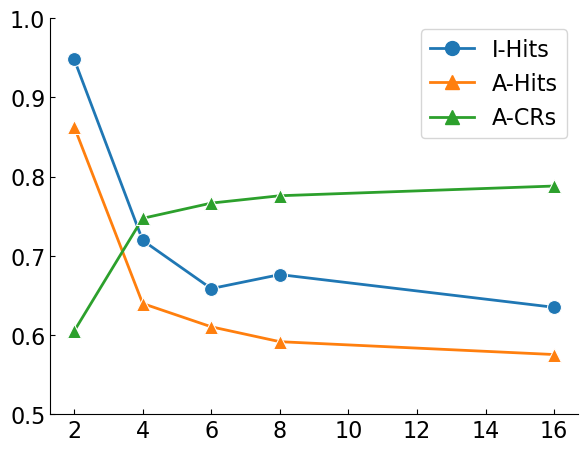

In [55]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'single_old'], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_old'], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 'pair_new'], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

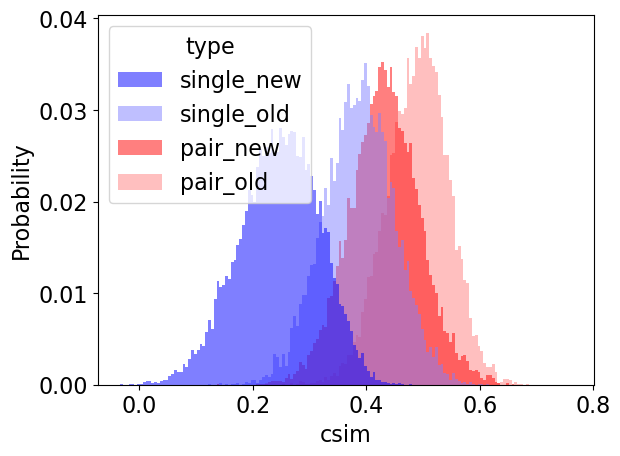

In [56]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = ['single_new', 'single_old', 'pair_new', 'pair_old'], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [57]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'single_old', 'yes_rate'].astype(float))
df_dprime['I_z_far'] = sp.stats.norm.ppf(np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_old', 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 'pair_new', 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.628361,-1.535444,3.163806,1.094245,-0.265676,1.359921
1,4,0.580904,-1.535444,2.116348,0.357573,-0.665870,1.023443
2,6,0.408412,-1.535444,1.943857,0.280024,-0.727261,1.007286
3,8,0.457122,-1.535444,1.992567,0.231326,-0.757943,0.989269
4,16,0.344813,-1.535444,1.880258,0.189759,-0.799580,0.989338


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

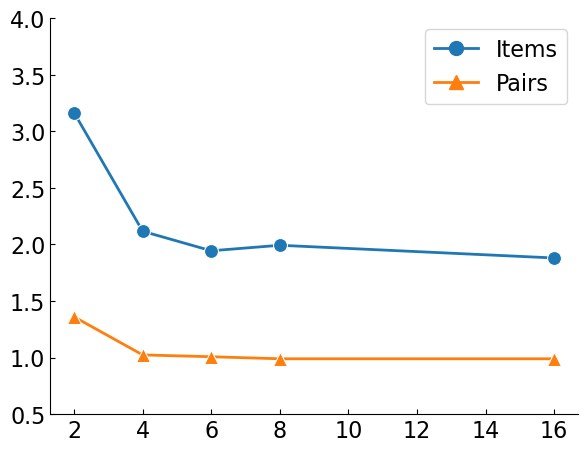

In [58]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,4])
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()

In [59]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == 'single_old', "yes_rate"].to_numpy()
I_far = np.mean(df_laggp.loc[df_laggp.type == 'single_new', 'yes_rate'].astype(float))
A_hr = df_laggp.loc[df_laggp.type == 'pair_old', "yes_rate"].to_numpy()
A_far = df_laggp.loc[df_laggp.type == 'pair_new', "yes_rate"].to_numpy()
# I_dprime = df_dprime['I_dprime'].to_numpy()
# A_dprime = df_dprime['A_dprime'].to_numpy()

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
I_far_gt = 0.12
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
A_far_gt = np.array([0.406, 0.371, 0.285, 0.259, 0.202])
# I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
# A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
# err = np.mean(np.power(I_hr - I_hr_gt,2)) + np.mean(np.power(A_hr - A_hr_gt,2)) \
#     + np.mean(np.power(I_dprime - I_dprime_gt,2)) + np.mean(np.power(A_dprime - A_dprime_gt,2))
err = np.mean(np.power(I_hr - I_hr_gt, 2)) + np.mean(np.power(A_hr - A_hr_gt, 2)) \
    + np.power(I_far - I_far_gt, 2) * 5 + np.mean(np.power(A_far - A_far_gt, 2))
err

0.03904575361984972

In [60]:
I_hr, I_far, A_hr, A_far

(array([0.94827586, 0.71934732, 0.65851449, 0.67620835, 0.63488261]),
 0.06233734001422536,
 array([0.86307622, 0.63966866, 0.61027052, 0.59146919, 0.57525084]),
 array([0.3952445 , 0.25274725, 0.23353293, 0.22424242, 0.21197719]))